In [ ]:
import pandas as pd
import geopandas as gp
from shapely import wkb
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ana's Filepath:
#filepath = '/content/drive/MyDrive/us_wildfires.csv'

# Rachel's Filepath:
filepath= '/content/drive/MyDrive/CodeOp/data.csv'

us_wildfires = pd.read_csv(filepath)

<ipython-input-40-60b3733f304a>:7: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  us_wildfires = pd.read_csv(filepath)


In [ ]:
us_wildfires.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [ ]:
us_wildfires.columns.tolist()

['OBJECTID',
 'Shape',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_PLUS_INCIDENT_JOIN_ID',
 'ICS_209_PLUS_COMPLEX_JOIN_ID',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'NWCG_CAUSE_CLASSIFICATION',
 'NWCG_GENERAL_CAUSE',
 'NWCG_CAUSE_AGE_CATEGORY',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME']

I investigated the 'shape' column and it seems an interesting column to keep, it's related to the shape of the fires, same you had in the dataset you found:

"The "Shape" column in your dataset appears to contain binary data representing the geometries of the wildfires. This binary data is likely encoded in a specific format, such as Well-Known Binary (WKB) or Esri shapefile format.

To interpret this data and extract meaningful information, you'll need to use a Geographic Information System (GIS) software or library that can handle the specific format in which the geometries are encoded. GIS tools like QGIS, ArcGIS, or geospatial libraries in programming languages like Python (e.g., GeoPandas, Shapely) can help you work with and visualize this data."

Now on to the next columns...


In [ ]:
identical = (us_wildfires['OBJECTID'] == us_wildfires['FOD_ID']).all()

if identical:
    print("Exact same values")
else:
    print("Columns are different.")

Columns are different.


In [ ]:
# Finding the indices where the values in the two columns are not equal
indices_where_different = us_wildfires[us_wildfires['OBJECTID'] != us_wildfires['FOD_ID']].index

# Getting the first few instances where the values differ
first_few_instances = us_wildfires.loc[indices_where_different].head()

first_few_instances

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
72,73,b'\x00\x01\xad\x10\x00\x00\x107\xe9\xae\x93\xc...,74,FS-1419045,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,114,...,2300.0,3.00,B,48.894444,-115.165278,STATE OR PRIVATE,MT,53.0,30053.0,Lincoln County
73,74,b'\x00\x01\xad\x10\x00\x00\xa8b\xa6\xc4 \xc7\\...,75,FS-1419047,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,114,...,2115.0,0.25,A,48.816944,-115.111389,STATE OR PRIVATE,MT,53.0,30053.0,Lincoln County
74,75,b'\x00\x01\xad\x10\x00\x00\xa89\xae\x83y\xc5\\...,76,FS-1419050,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,114,...,1815.0,0.10,A,48.962500,-115.085556,STATE OR PRIVATE,MT,53.0,30053.0,Lincoln County
75,76,b'\x00\x01\xad\x10\x00\x00x2\xd9!\xd9\r\\\xc0\...,77,FS-1419053,FED,FS-FIRESTAT,FS,USAZKNF,Kaibab National Forest,307,...,1949.0,0.50,B,35.236389,-112.216389,USFS,AZ,5.0,4005.0,Coconino County
76,77,b'\x00\x01\xad\x10\x00\x00 \xb1![\x1d\xe2^\xc0...,78,FS-1419054,FED,FS-FIRESTAT,FS,USCASRF,Six Rivers National Forest,510,...,1130.0,0.10,A,41.037222,-123.533056,USFS,CA,NaN,NaN,NaN


the file "_variable_descriptions" contains the info on the meaning of each column.
I think the columns FPA_ID, SOURCE_SYSTEM_TYPE and SOURCE_SYSTEM won't do us anything and could drop them. However, NWCG_REPORTING_AGENCY seems interesting, because checking which agency reported could help us predict the type or cause of the fire (or whatever we end-up predicting lol)

In [ ]:
us_wildfires.NWCG_REPORTING_AGENCY.value_counts()

ST/C&L    1728168
FS         250995
BIA        138996
BLM        113672
NPS         23599
IA          21853
FWS         21331
TRIBE        4737
DOD           163
BOR            37
DOE            13
Tribe           2
Name: NWCG_REPORTING_AGENCY, dtype: int64

In [ ]:
# Replacing 'Tribe' with 'TRIBE'
us_wildfires['NWCG_REPORTING_AGENCY'] = us_wildfires['NWCG_REPORTING_AGENCY'].replace('Tribe', 'TRIBE')

# Checking the value counts again
us_wildfires.NWCG_REPORTING_AGENCY.value_counts()

ST/C&L    1728168
FS         250995
BIA        138996
BLM        113672
NPS         23599
IA          21853
FWS         21331
TRIBE        4739
DOD           163
BOR            37
DOE            13
Name: NWCG_REPORTING_AGENCY, dtype: int64

I guess the columns with the specific unit that reported the fire, might be useful data as well. But, we have a column with the ID and a column with the name. I guess we could keep only one of them.

In [ ]:
us_wildfires.NWCG_REPORTING_UNIT_ID.value_counts()

USGAGAS    183063
USTXTXS    171567
USNCNCS    125786
USFLFLS     95278
USNYNYX     93024
            ...  
USTXSMR         1
USNDJDR         1
USAKKDR         1
USWYHLR         1
USWYTDX         1
Name: NWCG_REPORTING_UNIT_ID, Length: 2143, dtype: int64

In [ ]:
us_wildfires.NWCG_REPORTING_UNIT_NAME.value_counts()

Georgia Forestry Commission                                    183063
Texas A & M Forest Service                                     171567
North Carolina Forest Service                                  125786
Florida Forest Service                                          95278
Fire Department of New York                                     93024
                                                                ...  
Northwest Montana Wetland Management District - Lake County         1
Lower Hatchie National Wildlife Refuge                              1
Trinity River National Wildlife Refuge                              1
Huleia National Wildlife Refuge                                     1
National Capitol Regional Office                                    1
Name: NWCG_REPORTING_UNIT_NAME, Length: 2105, dtype: int64

In [ ]:
# Converting all strings to lowercase
us_wildfires['NWCG_REPORTING_UNIT_NAME'] = us_wildfires['NWCG_REPORTING_UNIT_NAME'].str.lower()
us_wildfires['NWCG_REPORTING_UNIT_NAME'] = us_wildfires['NWCG_REPORTING_UNIT_NAME'].str.replace(' and ',' & ')
us_wildfires['NWCG_REPORTING_UNIT_NAME'] = us_wildfires['NWCG_REPORTING_UNIT_NAME'].str.replace('-', ' ')
us_wildfires['NWCG_REPORTING_UNIT_NAME'] = us_wildfires['NWCG_REPORTING_UNIT_NAME'].str.replace(',', '')
us_wildfires['NWCG_REPORTING_UNIT_NAME'] = us_wildfires['NWCG_REPORTING_UNIT_NAME'].str.replace('   ', ' ')
us_wildfires['NWCG_REPORTING_UNIT_NAME'] = us_wildfires['NWCG_REPORTING_UNIT_NAME'].str.replace('  ', ' ')
us_wildfires['NWCG_REPORTING_UNIT_NAME'] = us_wildfires['NWCG_REPORTING_UNIT_NAME'].str.replace(' & ', '&')


us_wildfires.NWCG_REPORTING_UNIT_NAME.value_counts()

KeyboardInterrupt: 

In [ ]:
similar_names = {}
for name in us_wildfires['NWCG_REPORTING_UNIT_NAME'].unique():
    similar_names[name] = []
    name_words = set(name.split())  # Split the name into individual words and create a set
    for other_name in us_wildfires['NWCG_REPORTING_UNIT_NAME'].unique():
        if name != other_name:
            other_name_words = set(other_name.split())  # Split the other name into individual words and create a set
            # Case 1: Similar names with different punctuation/spaces
            if name in other_name or other_name in name:
                similar_names[name].append(other_name)
            # Case 2: Similar names with different word orders
            elif name_words == other_name_words:
                similar_names[name].append(other_name)

# Display similar names
for name, similar in similar_names.items():
    if similar:
        print(f"Name: {name}, Similar Names: {similar}")

Name: alaska fire service, Similar Names: ['alaska fire service tanana zone', 'alaska fire service galena zone', 'alaska fire service military zone', 'alaska fire service upper yukon zone']
Name: pacific regional office, Similar Names: ['mid pacific regional office']
Name: central california area office, Similar Names: ['south central california area office']
Name: yukon delta national wildlife refuge, Similar Names: ['delta national wildlife refuge']
Name: columbia national wildlife refuge, Similar Names: ['mid columbia national wildlife refuge complex']
Name: tishomingo national wildlife refuge, Similar Names: ['mingo national wildlife refuge']
Name: arthur r. marshall/loxahatchee national wildlife refuge, Similar Names: ['marshall']
Name: mid columbia national wildlife refuge complex, Similar Names: ['columbia national wildlife refuge']
Name: delta national wildlife refuge, Similar Names: ['yukon delta national wildlife refuge']
Name: mingo national wildlife refuge, Similar Names: [

Found many similarities. Checking one of them:



















In [ ]:
condition = us_wildfires['NWCG_REPORTING_UNIT_NAME'].isin(['clark county', 'clark county fire department'])

filtered_rows = us_wildfires[condition]

desired_columns = ['NWCG_REPORTING_AGENCY','NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME','OWNER_DESCR','COUNTY',
 'STATE']
selected_df = filtered_rows[desired_columns]

selected_df

,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,OWNER_DESCR,COUNTY,STATE
1439425,ST/C&L,USKSCAX,clark county,MISSING/NOT SPECIFIED,Clark,KS
1439446,ST/C&L,USKSCAX,clark county,MISSING/NOT SPECIFIED,Clark,KS
1439447,ST/C&L,USKSCAX,clark county,MISSING/NOT SPECIFIED,Clark,KS
1439448,ST/C&L,USKSCAX,clark county,MISSING/NOT SPECIFIED,Clark,KS
1657774,ST/C&L,USSDCLX,clark county,STATE,Clark,SD
...,...,...,...,...,...,...
2290967,ST/C&L,USNVCLRX,clark county fire department,PRIVATE,Clark,NV
2290976,ST/C&L,USNVCLRX,clark county fire department,PRIVATE,Clark,NV
2291034,ST/C&L,USNVCLRX,clark county fire department,BLM,Clark,NV
2291315,ST/C&L,USNVCLRX,clark county fire department,PRIVATE,Clark,NV


In [ ]:
us_wildfires.SOURCE_REPORTING_UNIT_NAME.value_counts()

Georgia Forestry Commission                                          113791
Fire Department of New York                                           93024
Texas Forest Service                                                  78755
South Carolina Forestry Commission                                    58612
Headquarters, California Department of Forestry & Fire Protection     53986
                                                                      ...  
MANDALAY NWR                                                              1
TUALATIN RIV NWR                                                          1
CULEBRA NWR                                                               1
RAPPAHANNOCK RIV VLY NWR                                                  1
National Capitol Regional Office                                          1
Name: SOURCE_REPORTING_UNIT_NAME, Length: 5203, dtype: int64

I think we should drop the column above (SOURCE_REPORTING_UNIT_NAME) and also the SOURCE_REPORTING_UNIT column. IBecause theyt are very similar and kind of duplicated with the NWCG columns.

Here's what I found:

NWCG_REPORTING_UNIT_NAME:

This column likely represents the name of the reporting unit according to the National Wildfire Coordinating Group (NWCG) standards. The NWCG is an interagency group that provides national leadership to enable interoperable wildland fire operations among federal, state, local, tribal, and territorial partners.
The values in this column seem to follow a consistent format and naming convention, such as agency names followed by specific unit names.

SOURCE_REPORTING_UNIT_NAME:

This column likely represents the name of the reporting unit as recorded in the data source from which your dataset originates.
It may or may not follow the same naming convention or standards as the NWCG. The values in this column might come from various sources and could have different formats or naming conventions depending on the source system.






I think we can also drop the columns LOCAL_FIRE_REPORT_ID and LOCAL_INCIDENT_ID, they seem "meaningless"

In [ ]:
us_wildfires.FIRE_CODE.value_counts()

D44Z    9441
5555    5143
D5GJ    3453
0001    3329
0000    1927
        ... 
B6HY       1
B6L7       1
B7EZ       1
B7L9       1
MMY5       1
Name: FIRE_CODE, Length: 230341, dtype: int64

In [ ]:
us_wildfires.FIRE_NAME.value_counts()

UNKNOWN                      21356
GRASS FIRE                    6713
NOT NAMED                     4043
LOCAL                         2068
STATE                         1423
                             ...  
REDMAN RUN                       1
DRAFTING FIRE                    1
RESTRICTED ALEX                  1
MCCLAY FLATS                     1
TAYLOR POND                      1
Name: FIRE_NAME, Length: 701431, dtype: int64

I'd drop the columns ICS_209_PLUS_INCIDENT_JOIN_ID',
 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME' and 'COMPLEX_NAME' as well.

In [ ]:
us_wildfires.isna().sum()

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

All good with FIRE_YEAR, DISCOVERY_DATE and DISCOVERY_DOY columns. I think we should keep all 3.

It's a shame so many missing values for the DISCOVERY_TIME, we have to think what to do with it.

However, I think is very problematic that we don't have the CONT_DATE, CONT_DOY, CONT_TIME for so many entries. Must think what to do about that.

In [ ]:
us_wildfires.NWCG_CAUSE_CLASSIFICATION.value_counts()

Human                                      1782906
Natural                                     327319
Missing data/not specified/undetermined     193341
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

In [ ]:
us_wildfires.NWCG_GENERAL_CAUSE.value_counts()

Missing data/not specified/undetermined       597933
Debris and open burning                       535851
Natural                                       327319
Arson/incendiarism                            320814
Equipment and vehicle use                     190319
Recreation and ceremony                        99473
Misuse of fire by a minor                      66280
Smoking                                        63783
Railroad operations and maintenance            37292
Power generation/transmission/distribution     32652
Fireworks                                      18599
Other causes                                   10517
Firearms and explosives use                     2734
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
us_wildfires.NWCG_CAUSE_AGE_CATEGORY.value_counts()

Minor    75527
Name: NWCG_CAUSE_AGE_CATEGORY, dtype: int64

In [ ]:
us_wildfires.OWNER_DESCR.value_counts()

MISSING/NOT SPECIFIED    1068424
PRIVATE                   597678
USFS                      214541
BIA                       123312
BLM                        73739
STATE OR PRIVATE           71576
STATE                      56487
NPS                        19938
MUNICIPAL/LOCAL            19602
OTHER FEDERAL              15231
FWS                        13923
TRIBAL                     11680
UNDEFINED FEDERAL          10548
COUNTY                      6343
BOR                          521
FOREIGN                       21
Private                        2
Name: OWNER_DESCR, dtype: int64

In [ ]:
# Replacing 'Private' with 'PRIVATE'
us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace('Private', 'PRIVATE')

# Checking the value counts again
us_wildfires.OWNER_DESCR.value_counts()

MISSING/NOT SPECIFIED    1068424
PRIVATE                   597680
USFS                      214541
BIA                       123312
BLM                        73739
STATE OR PRIVATE           71576
STATE                      56487
NPS                        19938
MUNICIPAL/LOCAL            19602
OTHER FEDERAL              15231
FWS                        13923
TRIBAL                     11680
UNDEFINED FEDERAL          10548
COUNTY                      6343
BOR                          521
FOREIGN                       21
Name: OWNER_DESCR, dtype: int64

I don't understand the columns COUNTY(values are numbers), FIPS_CODE, and FIPS_NAME very well. And they have too many NaNs. I think we can just drop them.

In [ ]:
us_wildfires['COUNTY'].value_counts()

Maricopa                13996
RIVERSIDE               12800
Lincoln                  9201
Washington               8977
Jackson                  8578
                        ...  
Wilkes County               1
Gallia County               1
Miami-Dade County           1
Bourbon, KS                 1
District of Columbia        1
Name: COUNTY, Length: 4126, dtype: int64

In [ ]:
# Group by 'COUNTY' and count the unique 'STATE' values
county_state_counts = us_wildfires.groupby('COUNTY')['STATE'].nunique()

# Filter the counties that repeat across different states
repeated_counties = county_state_counts[county_state_counts > 1].index

# Filter the original DataFrame to include only the repeated counties
repeated_county_df = us_wildfires[us_wildfires['COUNTY'].isin(repeated_counties)]

# Drop duplicates to ensure each county appears only once
repeated_county_df = repeated_county_df[['COUNTY', 'STATE']].drop_duplicates()

repeated_county_df

,COUNTY,STATE
0,63.0,CA
1,61.0,CA
2,17.0,CA
3,3.0,CA
5,5.0,CA
...,...,...
2287925,Kiowa,OK
2300617,Perry,OH
2300856,Lake,IN
2301611,Monroe,OH


In [ ]:
us_wildfires['COUNTY_numeric'] = pd.to_numeric(us_wildfires['COUNTY'], errors='coerce')

In [ ]:
numbers_only_df = us_wildfires.dropna(subset=['COUNTY_numeric'])

In [ ]:
us_wildfires['FIPS_NAME'].value_counts().head(50)

Riverside County         17159
Maricopa County          15911
Washington County        12841
Lincoln County           12753
Jackson County           12357
Jefferson County         11939
Coconino County          10561
Marion County            10535
Cherokee County          10390
Monroe County            10294
Polk County               9613
Los Angeles County        9584
Suffolk County            9025
Orange County             8772
Lee County                8431
Wayne County              8324
Douglas County            8284
Fresno County             8236
Lake County               7623
San Bernardino County     7475
Honolulu County           6791
San Diego County          6648
Clay County               6612
Franklin County           6540
Jasper County             6532
Columbia County           6177
Ocean County              6167
Richmond County           6128
Montgomery County         5912
Union County              5887
Grant County              5592
Madison County            5527
Laurens 

In [ ]:
import requests

def reverse_geocode(lat, lon):
  url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json"
  response = requests.get(url)
  data = response.json()
  if 'error' in data:
      return None
  else:
      return data['address']['county']

In [ ]:
for index, row in numbers_only_df.iterrows():
  county_name = reverse_geocode(row['LATITUDE'], row['LONGITUDE'])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

If we want to keep this county column I found a way to use the coordinates to extract the counties, we can decide togheter if we want to test it, the API in theory is free.


Here's how you can use the OpenStreetMap Nominatim API for reverse geocoding:


import requests


def reverse_geocode(lat, lon):

    url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json"
    response = requests.get(url)
    data = response.json()
    if 'error' in data:
        return None
    else:
        return data['address']['county']


Iterate over rows and perform reverse geocoding
for index, row in df.iterrows():

    county_name = reverse_geocode(row['latitude'], row['longitude'])

In [ ]:
us_wildfires['COUNTY'].isna().value_counts()

False    1637787
True      665779
Name: COUNTY, dtype: int64

In [ ]:
us_wildfires[['COUNTY','FIPS_NAME']].isna().value_counts()

COUNTY  FIPS_NAME
False   False        1637786
True    True          665779
False   True               1
dtype: int64

In [ ]:
columns_to_drop = ['FOD_ID', 'FPA_ID', 'Shape', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_UNIT_NAME',
                   'SOURCE_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'LOCAL_FIRE_REPORT_ID',
                   'LOCAL_INCIDENT_ID', 'FIRE_CODE',
                   'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
                   'MTBS_ID', 'MTBS_FIRE_NAME',
                   'COMPLEX_NAME', 'FIPS_CODE', 'COUNTY']

us_wildfires = us_wildfires.drop(us_wildfires[columns_to_drop], axis=1)

In [ ]:
us_wildfires['COUNTY']=us_wildfires['FIPS_NAME']
us_wildfires = us_wildfires.drop(us_wildfires['FIPS_NAME'], axis=1)

Now we have dropped 17 columns, and we started with 39. We should have 22 remaining -

In [ ]:
us_wildfires.shape

(2303566, 22)

I'm going to work my way through the columns again and see what more we can do, there may be some rows we can remove.

In [ ]:
us_wildfires = us_wildfires.drop('FIPS_NAME', axis=1)

In [ ]:
us_wildfires.columns

Index(['OBJECTID', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY'],
      dtype='object')

In [ ]:
us_wildfires['Shape'][1]

"b'\\x00\\x01\\xad\\x10\\x00\\x00\\xc8\\xe594\\xe2\\x19^\\xc0\\xa0\\xe4\\xc51nwC@\\xc8\\xe594\\xe2\\x19^\\xc0\\xa0\\xe4\\xc51nwC@|\\x01\\x00\\x00\\x00\\xc8\\xe594\\xe2\\x19^\\xc0\\xa0\\xe4\\xc51nwC@\\xfe'"

In [ ]:
#fire_geom = wkb.loads(us_wildfires['Shape'])

In [ ]:
us_wildfires.isna().sum()

OBJECTID                           0
Shape                              0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_NAME           0
FIRE_NAME                     995415
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                789095
NWCG_CAUSE_CLASSIFICATION          0
NWCG_GENERAL_CAUSE                 0
NWCG_CAUSE_AGE_CATEGORY      2228039
CONT_DATE                     894813
CONT_DOY                      894813
CONT_TIME                     990880
FIRE_SIZE                          0
FIRE_SIZE_CLASS                    0
LATITUDE                           0
LONGITUDE                          0
OWNER_DESCR                        0
STATE                              0
COUNTY                        665779
dtype: int64

In [ ]:
# Starting with Reporting Agency
us_wildfires['NWCG_REPORTING_AGENCY'].value_counts()

ST/C&L    1728168
FS         250995
BIA        138996
BLM        113672
NPS         23599
IA          21853
FWS         21331
TRIBE        4739
DOD           163
BOR            37
DOE            13
Name: NWCG_REPORTING_AGENCY, dtype: int64

I think with the above we need to find a way to decode these for it to be meaningful for us - this is the list from Kaggle - BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, BOR = Bureau of Reclamation, DOD = Department of Defense, DOE = Department of Energy, FS = Forest Service, FWS = Fish and Wildlife Service, IA = Interagency Organization, NPS = National Park Service, ST/C&L = State, County, or Local Organization, and TRIBE = Tribal Organization


In [ ]:
agency_mapping = {
    'BIA': 'Bureau of Indian Affairs',
    'BLM': 'Bureau of Land Management',
    'BOR': 'Bureau of Reclamation',
    'DOD': 'Department of Defense',
    'DOE': 'Department of Energy',
    'FS': 'Forest Service',
    'FWS': 'Fish and Wildlife Service',
    'IA': 'Interagency Organization',
    'NPS': 'National Park Service',
    'ST/C&L': 'State, County, or Local Organization',
    'TRIBE': 'Tribal Organization'
}

us_wildfires['NWCG_REPORTING_AGENCY'] = us_wildfires['NWCG_REPORTING_AGENCY'].replace(agency_mapping)

us_wildfires['NWCG_REPORTING_AGENCY'].value_counts()

State, County, or Local Organization    1728168
Forest Service                           250995
Bureau of Indian Affairs                 138996
Bureau of Land Management                113672
National Park Service                     23599
Interagency Organization                  21853
Fish and Wildlife Service                 21331
Tribal Organization                        4739
Department of Defense                       163
Bureau of Reclamation                        37
Department of Energy                         13
Name: NWCG_REPORTING_AGENCY, dtype: int64

In [ ]:
unit_list = us_wildfires['NWCG_REPORTING_UNIT_NAME'].value_counts().sort_index(ascending=True)

In [ ]:
unit_list[100:150]

baca national wildlife refuge                           3
back bay national wildlife refuge                      20
badlands national park                                 67
baker unit                                            314
balcones canyon national wildlife refuge              165
bald knob national wildlife refuge                      2
bandelier national monument                           157
banks lake national wildlife refuge                     1
bannock county                                         13
barber county                                           7
barton county                                          48
basalt & rural fire protection district                14
baskett slough national wildlife refuge                15
batesland volunteer fire department                     2
bath volunteer fire department                          2
battle mountain district office                      1085
bayou sauvage national wildlife refuge                131
beadle county 

I have looked at the first ~200 rows and so far there are a few things we could combine, for example:

alaska fire service with 'alaska fire service - x zone' (galena, military, tanana, upper yukon) <br><br>
arizona department of forestry and fire management has several districts - central district, northeast district, northern district, northwest district, southeast district, state office
<br>

However, I think it will take a while to go through all 2000 rows to figure this out, so instead maybe it is worth taking the top 1000 entries, and categorising the others as 'Other'?

In [ ]:
unit_list.nlargest(1000)

georgia forestry commission          183063
texas a & m forest service           171567
north carolina forest service        125786
florida forest service                95278
fire department of new york           93024
                                      ...  
brown county                             28
chiricahua national monument             28
dawson county                            28
forest lakes fire department             28
lefthand fire protection district        28
Name: NWCG_REPORTING_UNIT_NAME, Length: 1000, dtype: int64

The top 1000 entries gives us locations which reported up to 28 fires, maybe instead we cap the number of reported fires to 10, 20 or 30, - we can always change this later if a model decides it it meaningless?

In [ ]:
us_wildfires['FIRE_NAME'].value_counts().head(20)

UNKNOWN                      21356
GRASS FIRE                    6713
NOT NAMED                     4043
LOCAL                         2068
STATE                         1423
DENVER                         862
COTTONWOOD                     844
POWERLINE                      835
ROCK                           787
BEAR                           739
LOCAL FIRE                     726
WILLOW                         715
RIVER                          686
CREEK                          651
LAKE                           649
CANYON                         633
SPRING                         614
RIDGE                          607
LOCAL                          596
BRIDGE                         573
Name: FIRE_NAME, dtype: int64

In [ ]:
us_wildfires['FIRE_NAME'] = us_wildfires['FIRE_NAME'].replace('NOT NAMED', 'UNKNOWN')
us_wildfires['FIRE_NAME'] = us_wildfires['FIRE_NAME'].replace('LOCAL', 'LOCAL FIRE')
us_wildfires['FIRE_NAME'] = us_wildfires['FIRE_NAME'].fillna('UNKNOWN')
us_wildfires['FIRE_NAME'].value_counts().head(50)

UNKNOWN                      1020814
GRASS FIRE                      6713
LOCAL                           2068
STATE                           1423
DENVER                           862
COTTONWOOD                       844
POWERLINE                        835
ROCK                             787
LOCAL FIRE                       783
BEAR                             739
LOCAL FIRE                       726
WILLOW                           715
RIVER                            686
CREEK                            651
LAKE                             649
CANYON                           633
SPRING                           614
RIDGE                            607
BRIDGE                           573
HORSE                            570
PINE                             566
GRASS                            565
LOST                             549
BOULDER                          535
BRUSH FIRE                       528
RAILROAD                         516
COYOTE                           512
E

In [ ]:
# Merging variations of 'LOCAL FIRE' into a single category
us_wildfires['FIRE_NAME'] = us_wildfires['FIRE_NAME'].str.strip()  # Remove leading and trailing whitespaces
us_wildfires['FIRE_NAME'] = us_wildfires['FIRE_NAME'].replace(['LOCAL', 'LOCAL FIRE', 'LOCAL FIRE '], 'LOCAL FIRE')

us_wildfires['FIRE_NAME'].value_counts().head(20)

UNKNOWN       1020826
GRASS FIRE       6968
LOCAL FIRE       3577
STATE            1780
RIVER             932
COTTONWOOD        902
POWERLINE         864
DENVER            863
ROCK              852
BEAR              805
WILLOW            793
CREEK             769
LAKE              768
ROADSIDE          764
CANYON            726
RIDGE             693
SPRING            688
BRIDGE            643
HIGHWAY           640
GRASS             633
Name: FIRE_NAME, dtype: int64

The remaining names can potentially give us a clue as to either fire-type or habitat-type (e.g. river, creek lake areas must be near water sources) and may be good features that the ML will pick up on.

<Axes: xlabel='FIRE_YEAR', ylabel='Count'>

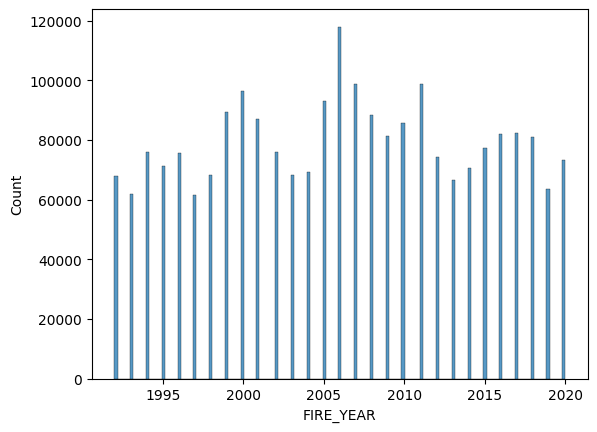

In [ ]:
sns.histplot(x=us_wildfires['FIRE_YEAR'])

Just looking at the distribution of fire-year data we have, and it looks relatively even, with a peak in 2006. May be worth looking at climate events in 2006?

<Axes: xlabel='DISCOVERY_DOY', ylabel='Count'>

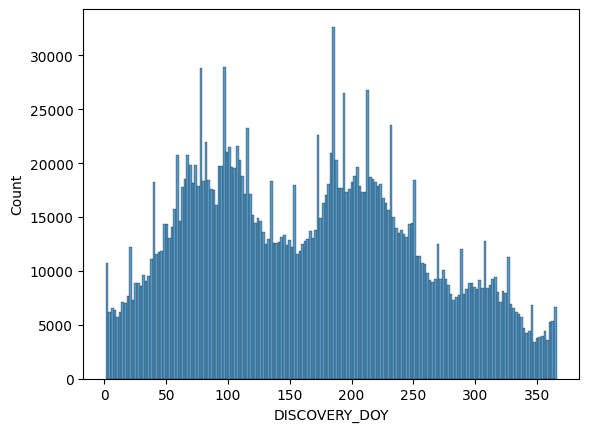

In [ ]:
sns.histplot(x=us_wildfires['DISCOVERY_DOY'])

The above shows the distribution of Day of Year it's discovered which shows the seasonality, quite interestingly a dip between Spring/Summer.

Need to change Discovery Date and Discovery Time to datetime, and CONT_DATE and CONT_TIME to datetime.

In [ ]:
us_wildfires["DISCOVERY_DATE"].head()

0     2/2/2005
1    5/12/2004
2    5/31/2004
3    6/28/2004
4    6/28/2004
Name: DISCOVERY_DATE, dtype: object

In [ ]:
us_wildfires["DISCOVERY_DATE"] = pd.to_datetime(us_wildfires["DISCOVERY_DATE"], format = "%m/%d/%Y")

In [ ]:
us_wildfires["DISCOVERY_DATE"].head()

0   2005-02-02
1   2004-05-12
2   2004-05-31
3   2004-06-28
4   2004-06-28
Name: DISCOVERY_DATE, dtype: datetime64[ns]

In [ ]:
us_wildfires["CONT_DATE"] = pd.to_datetime(us_wildfires["CONT_DATE"], format = "%m/%d/%Y")

In [ ]:
us_wildfires['CONT_DATE'].head()

0   2005-02-02
1   2004-05-12
2   2004-05-31
3   2004-07-03
4   2004-07-03
Name: CONT_DATE, dtype: datetime64[ns]

In [ ]:
us_wildfires["DISCOVERY_TIME"].value_counts().sort_index(ascending=True)[100:200]

100.0    1936
101.0     167
102.0     141
103.0     140
104.0     126
         ... 
156.0      91
157.0     122
158.0     123
159.0     111
200.0    1512
Name: DISCOVERY_TIME, Length: 61, dtype: int64

In [ ]:
us_wildfires["DISCOVERY_TIME"].value_counts()


0nan      789095
1400.0     27093
1500.0     26193
1600.0     23653
1300.0     23302
           ...  
357.0         66
412.0         65
421.0         65
413.0         64
447.0         64
Name: DISCOVERY_TIME, Length: 1441, dtype: int64

In [ ]:
us_wildfires["DISCOVERY_TIME"] = pd.to_datetime(us_wildfires["DISCOVERY_TIME"], format = "%H%M")

ValueError: time data '5' does not match format '%H%M' (match)

In [ ]:
#Converting to string
us_wildfires["DISCOVERY_TIME"] = us_wildfires["DISCOVERY_TIME"].astype(str)

us_wildfires["DISCOVERY_TIME"] = us_wildfires["DISCOVERY_TIME"].str.rstrip(".0")

# Ensuring leading zeros are added to the time data
us_wildfires["DISCOVERY_TIME"] = us_wildfires["DISCOVERY_TIME"].str.zfill(4)

# Converting to datetime
us_wildfires["DISCOVERY_TIME"] = pd.to_datetime(us_wildfires["DISCOVERY_TIME"], format="%H%M", errors='coerce')

# Keeping only the time part
us_wildfires["DISCOVERY_TIME"] = us_wildfires["DISCOVERY_TIME"].dt.time

us_wildfires["DISCOVERY_TIME"].head()

0    00:13:00
1    08:45:00
2    19:21:00
3    00:16:00
4    00:16:00
Name: DISCOVERY_TIME, dtype: object

In [ ]:
#Converting to string
us_wildfires["CONT_TIME"] = us_wildfires["CONT_TIME"].astype(str)

us_wildfires["CONT_TIME"] = us_wildfires["CONT_TIME"].str.rstrip(".0")

# Ensuring leading zeros are added to the time data
us_wildfires["CONT_TIME"] = us_wildfires["CONT_TIME"].str.zfill(4)

# Converting to datetime
us_wildfires["CONT_TIME"] = pd.to_datetime(us_wildfires["CONT_TIME"], format="%H%M", errors='coerce')

# Keeping only the time part
us_wildfires["CONT_TIME"] = us_wildfires["CONT_TIME"].dt.time

us_wildfires["CONT_TIME"].head()

0         NaT
1    01:53:00
2    20:24:00
3    00:14:00
4    00:12:00
Name: CONT_TIME, dtype: object

In [ ]:
us_wildfires['NWCG_CAUSE_CLASSIFICATION'].value_counts()

Human                                      1782906
Natural                                     327319
Missing data/not specified/undetermined     193341
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

In [ ]:
us_wildfires['NWCG_CAUSE_CLASSIFICATION'] = us_wildfires['NWCG_CAUSE_CLASSIFICATION'].replace(
    "Missing data/not specified/undetermined", "undetermined")

us_wildfires['NWCG_CAUSE_CLASSIFICATION'].value_counts()

Human           1782906
Natural          327319
undetermined     193341
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

In [ ]:
us_wildfires['NWCG_GENERAL_CAUSE'].value_counts()

Missing data/not specified/undetermined       597933
Debris and open burning                       535851
Natural                                       327319
Arson/incendiarism                            320814
Equipment and vehicle use                     190319
Recreation and ceremony                        99473
Misuse of fire by a minor                      66280
Smoking                                        63783
Railroad operations and maintenance            37292
Power generation/transmission/distribution     32652
Fireworks                                      18599
Other causes                                   10517
Firearms and explosives use                     2734
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
us_wildfires['NWCG_GENERAL_CAUSE'] = us_wildfires['NWCG_GENERAL_CAUSE'].replace(
    "Missing data/not specified/undetermined", "undetermined")

us_wildfires['NWCG_GENERAL_CAUSE'] = us_wildfires['NWCG_GENERAL_CAUSE'].replace(
    "Arson/incendiarism", "Arson")

us_wildfires['NWCG_GENERAL_CAUSE'] = us_wildfires['NWCG_GENERAL_CAUSE'].replace(
    "Power generation/transmission/distribution", "Power supply")

us_wildfires['NWCG_GENERAL_CAUSE'].value_counts()

undetermined                           597933
Debris and open burning                535851
Natural                                327319
Arson                                  320814
Equipment and vehicle use              190319
Recreation and ceremony                 99473
Misuse of fire by a minor               66280
Smoking                                 63783
Railroad operations and maintenance     37292
Power supply                            32652
Fireworks                               18599
Other causes                            10517
Firearms and explosives use              2734
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
us_wildfires['NWCG_GENERAL_CAUSE'] = us_wildfires['NWCG_GENERAL_CAUSE'].replace(
    "undetermined", "Undetermined")

us_wildfires['NWCG_GENERAL_CAUSE'].value_counts()

Undetermined                           597933
Debris and open burning                535851
Natural                                327319
Arson                                  320814
Equipment and vehicle use              190319
Recreation and ceremony                 99473
Misuse of fire by a minor               66280
Smoking                                 63783
Railroad operations and maintenance     37292
Power supply                            32652
Fireworks                               18599
Other causes                            10517
Firearms and explosives use              2734
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
#Going to fill in the NaN from the NWCG_CAUSE_AGE_CATEGORY to say 'NULL' just so we have a value

us_wildfires['NWCG_CAUSE_AGE_CATEGORY'].value_counts()

NULL     2228039
Minor      75527
Name: NWCG_CAUSE_AGE_CATEGORY, dtype: int64

In [ ]:
us_wildfires['NWCG_CAUSE_AGE_CATEGORY'] = us_wildfires['NWCG_CAUSE_AGE_CATEGORY'].fillna("NULL")

In [ ]:
us_wildfires['FIRE_SIZE'].describe().apply(lambda x: format(x, 'f')) #Suppressing the scientific notation

count    2303566.000000
mean          78.160876
std         2630.832485
min            0.000010
25%            0.100000
50%            0.800000
75%            3.000000
max       662700.000000
Name: FIRE_SIZE, dtype: object

In [ ]:
us_wildfires['FIRE_SIZE_CLASS'].value_counts()

B    1104387
A     876409
C     257096
D      34008
E      17191
F       9692
G       4783
Name: FIRE_SIZE_CLASS, dtype: int64

The FIRE SIZE CLASS note from Kaggle states: <br>
A=greater than 0 but less than or equal to 0.25 acres,<br> B=0.26-9.9 acres, <br>C=10.0-99.9 acres, <br>D=100-299 acres, <br>E=300 to 999 acres, <br>F=1000 to 4999 acres, and <br>G=5000+ acres

So, A is small, G is huge

In [ ]:
us_wildfires[us_wildfires['CONT_DATE'].isna()].value_counts('FIRE_SIZE_CLASS')

FIRE_SIZE_CLASS
B    493697
A    271924
C    109182
D     12133
E      5019
F      2189
G       669
dtype: int64

In [ ]:
us_wildfires['OWNER_DESCR'].value_counts()

MISSING/NOT SPECIFIED    1068424
PRIVATE                   597680
USFS                      214541
BIA                       123312
BLM                        73739
STATE OR PRIVATE           71576
STATE                      56487
NPS                        19938
MUNICIPAL/LOCAL            19602
OTHER FEDERAL              15231
FWS                        13923
TRIBAL                     11680
UNDEFINED FEDERAL          10548
COUNTY                      6343
BOR                          521
FOREIGN                       21
Name: OWNER_DESCR, dtype: int64

In [ ]:
us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "MISSING/NOT SPECIFIED", "NOT SPECIFIED")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace([
    "UNDEFINED FEDERAL", "OTHER FEDERAL"], "FEDERAL")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "USFS", "FOREST SERVICE")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "BIA", "BUREAU OF INDIAN AFFAIRS")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "BLM", "BUREAU OF LAND MANAGEMENT")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "NPS", "NATIONAL PARK SERVICE")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "FWS", "FISH AND WILDLIFE SERVICE")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "BOR", "BUREAU OF RECLAMATION")

us_wildfires['OWNER_DESCR'] = us_wildfires['OWNER_DESCR'].replace(
    "STATE OR PRIVATE", "NOT SPECIFIED")

us_wildfires['OWNER_DESCR'].value_counts()

NOT SPECIFIED                1140000
PRIVATE                       597680
FOREST SERVICE                214541
BUREAU OF INDIAN AFFAIRS      123312
BUREAU OF LAND MANAGEMENT      73739
STATE                          56487
FEDERAL                        25779
NATIONAL PARK SERVICE          19938
MUNICIPAL/LOCAL                19602
FISH AND WILDLIFE SERVICE      13923
TRIBAL                         11680
COUNTY                          6343
BUREAU OF RECLAMATION            521
FOREIGN                           21
Name: OWNER_DESCR, dtype: int64

In [ ]:
us_wildfires['COUNTY'].value_counts().head(30)

Maricopa          13996
RIVERSIDE         12800
Lincoln            9201
Washington         8977
Jackson            8578
Cherokee           8179
Polk               8032
SUFFOLK            7981
Marion             7775
FRESNO             7339
LOS ANGELES        7136
Lee                7073
5.0                6798
Oahu               6788
Jefferson          6530
Ocean              6162
Clay               5792
Wayne              5597
ORANGE             5408
MERCED             5237
MONROE             4807
SAN DIEGO          4761
Taylor             4733
SAN BERNARDINO     4719
Harrison           4644
Cass               4581
Jasper             4534
Montgomery         4501
MADERA             4491
Cumberland         4420
Name: COUNTY, dtype: int64

In [ ]:
us_wildfires.isna().sum()

OBJECTID                          0
NWCG_REPORTING_AGENCY             0
NWCG_REPORTING_UNIT_ID            0
FIRE_NAME                         0
FIRE_YEAR                         0
DISCOVERY_DATE                    0
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
NWCG_CAUSE_AGE_CATEGORY           0
CONT_DATE                    894813
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
LATITUDE                          0
LONGITUDE                         0
OWNER_DESCR                       0
STATE                             0
COUNTY                       665780
dtype: int64

In [ ]:
columns_to_drop2 = ['DISCOVERY_DOY', 'DISCOVERY_TIME', 'CONT_DOY', 'CONT_TIME']

us_wildfires = us_wildfires.drop(us_wildfires[columns_to_drop2], axis=1)

In [ ]:
us_wildfires['FIRE_NAME']=us_wildfires['FIRE_NAME'].fillna('UNKNOWN')

In [ ]:
us_wildfires['FIRE_NAME'].value_counts()

UNKNOWN            1020826
GRASS FIRE            6968
LOCAL FIRE            3577
STATE                 1780
RIVER                  932
                    ...   
LAX TAXIDERMY            1
W. BASS BARREL           1
W. CARPENTER PL          1
SAR LK. EAS PL           1
TAYLOR POND              1
Name: FIRE_NAME, Length: 687749, dtype: int64

In [ ]:
us_wildfires.to_csv('/content/drive/MyDrive/CodeOp/clean_wildfires.csv', index=False)

#final_df.to_csv('final_dataset.csv', index=False)

In [ ]:
# To do:

# Fill in county

# Create 'duration' and fill in the CONT_DATE using Filipa's suggestions